# Diabetes Prediction
In this project I tried to develop a simple machine learning model to predict if a patient has Diabetes or not using the sklearn library. I used two algorithms namely Decision tree and Random Forest.

Importing the required libraries and reading the csv file into the notebook with pandas. 

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
import pandas as pd

df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [3]:
df.sample()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
655,2,155,52,27,540,38.7,0.24,25,1


The code above shows us random rows from the dataset. To change the number of rows type **df.sample(n)** where **n** is the number of rows you want to display.

In [4]:
df.shape

(768, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
counts = df['Outcome'].value_counts()
counts

0    500
1    268
Name: Outcome, dtype: int64

This shows that we have 500 people who have negative outcomes(do not have Diabetes) and 268 people have positve outcomes(have diabetes).

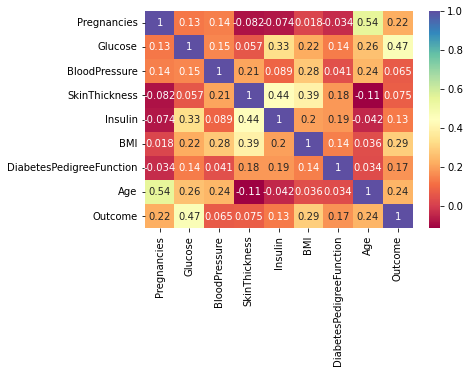

In [8]:
sns.heatmap(df.corr(), annot=True, cmap = 'Spectral')
plt.savefig('heat.png')

This shows us the collinearity of each feature column

In [9]:
X = df.iloc[:,0:7]
y = df.Outcome

The variable **X** above is used as the **feature/input** variable and we declare that variable by assigning it all the feature columns from the dataset.

The variable **y** is our **target/output** and we declare that variable by assigning it to the outcome column since that is what we are trying to predict.

In [10]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction
0,6,148,72,35,0,33.6,0.627
1,1,85,66,29,0,26.6,0.351
2,8,183,64,0,0,23.3,0.672
3,1,89,66,23,94,28.1,0.167
4,0,137,40,35,168,43.1,2.288


In [11]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [12]:
from sklearn.model_selection import train_test_split

The code above imports the train_test_split function from the sklearn library which is used to split the data into training and testing set.

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

We split the data into training and testing set and the **test_size=0.2** parameter splits the data into ratio 80:20. 80% for training data and 20% for testing data.

In [14]:
X_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction
189,5,139,80,35,160,31.6,0.361
350,4,92,80,0,0,42.2,0.237
756,7,137,90,41,0,32.0,0.391
134,2,96,68,13,49,21.1,0.647
76,7,62,78,0,0,32.6,0.391
...,...,...,...,...,...,...,...
64,7,114,66,0,0,32.8,0.258
320,4,129,60,12,231,27.5,0.527
207,5,162,104,0,0,37.7,0.151
304,3,150,76,0,0,21.0,0.207


In [15]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction
381,0,105,68,22,0,20.0,0.236
148,5,147,78,0,0,33.7,0.218
222,7,119,0,0,0,25.2,0.209
16,0,118,84,47,230,45.8,0.551
472,0,119,66,27,0,38.8,0.259
...,...,...,...,...,...,...,...
171,6,134,70,23,130,35.4,0.542
91,4,123,80,15,176,32.0,0.443
287,1,119,86,39,220,45.6,0.808
691,13,158,114,0,0,42.3,0.257


In [16]:
y_train

381    0
148    0
222    0
16     1
472    0
      ..
171    1
91     0
287    1
691    1
517    0
Name: Outcome, Length: 614, dtype: int64

In [17]:
y_test

189    1
350    0
756    0
134    0
76     0
      ..
64     1
320    0
207    1
304    0
201    0
Name: Outcome, Length: 154, dtype: int64

In [18]:
y_train.value_counts()

0    389
1    225
Name: Outcome, dtype: int64

In [19]:
y_test.value_counts()

0    111
1     43
Name: Outcome, dtype: int64

In [20]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()

clf.fit(X_train,y_train)

DecisionTreeClassifier()

Now we create a variable called clf with the Decision Tree Classifier function from sklearn and the we fit the X_train and y_train.

In [21]:
y_pred = clf.predict(X_test)
y_pred

**y_pred** Gives us the predicted values.

In [23]:
y_pred_df = pd.DataFrame(y_pred, columns=['Predictions'])
y_pred_df

,Predictions
0,1
1,0
2,1
3,0
4,0
...,...
149,1
150,1
151,1
152,1


In [24]:
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,Outcome
189,1
350,0
756,0
134,0
76,0


In [25]:
y_test_df = y_test_df.reset_index(drop=True)
y_test_df.head()

,Outcome
0,1
1,0
2,0
3,0
4,0


In [26]:
result_df = pd.concat([y_test_df,y_pred_df], axis=1)
result_df

,Outcome,Predictions
0,1,1
1,0,0
2,0,1
3,0,0
4,0,0
...,...,...
149,1,1
150,0,1
151,1,1
152,0,1


We save the predicted values and the actual outcome to a dataframe called **result_df**.

In [27]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,y_pred)

array([[78, 33],
       [17, 26]], dtype=int64)

We create a confusion matrix we can help us determine the number of times the algorithm got a correct prediction or not. 

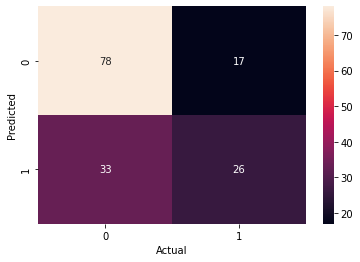

In [30]:
data =  {'y_Actual': y_test, 'y_Predicted': y_pred}

df = pd.DataFrame(data, columns = ['y_Actual','y_Predicted'])

clf_confusion_matrix = pd.crosstab(df['y_Predicted'], df['y_Actual'], rownames = ['Predicted'], colnames=['Actual'])

sns.heatmap(clf_confusion_matrix, annot = True)
plt.savefig('heat.png')

We plot a confusion matrix which can better supplement the information.

In [31]:
from sklearn.ensemble import RandomForestClassifier

clf2 = RandomForestClassifier(n_estimators = 200)

clf2.fit(X_train, y_train)

y_pred_rf = clf2.predict(X_test)

We now use the RandomForestClassifier function from sklearn to see if we can build a more accurate predictiv model.

In [32]:
confusion_matrix(y_test, y_pred_rf)

array([[97, 14],
       [16, 27]], dtype=int64)

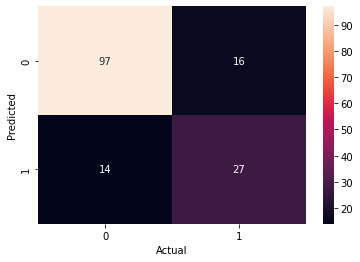

In [33]:
data =  {'y_Actual': y_test, 'y_Predicted': y_pred_rf}

df = pd.DataFrame(data, columns = ['y_Actual','y_Predicted'])

clf_confusion_matrix = pd.crosstab(df['y_Predicted'], df['y_Actual'], rownames = ['Predicted'], colnames=['Actual'])

sns.heatmap(clf_confusion_matrix, annot = True)
plt.savefig('heat2.png')

From the confusion matrix above it can be seen that when compared with the decision tree model it got more predictions correct therefore we can pick this model.

In [34]:
joblib.dump(clf2, 'diabetes_rf_model.pkl')

['diabetes_rf_model.pkl']

The function **joblib.dump** saves the predictive model to a pickle file which can the be loaded and used for predictions.